## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.metrics import r2_score

In [2]:
data = [[1,1],
        [3,2],
        [4,4],
        [6,4],
        [8,5],
        [9,7],
        [11,8],
        [14,13]]
df = pd.DataFrame(data)
df

,0,1
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [4]:
df["not_attended"] = df[0]-df[1]
df

,0,1,not_attended
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


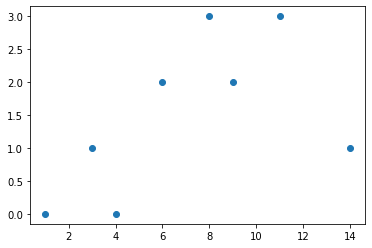

In [5]:
plt.scatter(df[0], df["not_attended"])

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

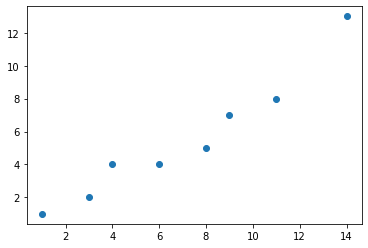

In [44]:
plt.scatter(df[0], df[1])

In [45]:
## Fitting a regression line
lr = LinearRegression()
lr.fit(df[0].to_frame(), df[1])

LinearRegression()

In [46]:
x = [[i] for i in range(0,15)]
y = lr.predict(x)

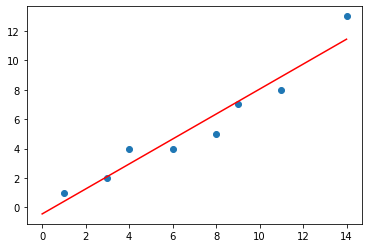

In [47]:
plt.scatter(df[0], df[1])
plt.plot(x,y, c="r")

In [48]:
df["y_pred"] = lr.predict(df[0].to_frame())  
df["residuals"] = df["y_pred"] - df[1]

In [49]:
df

,0,1,y_pred,residuals
0,1,1,0.409091,-0.590909
1,3,2,2.106061,0.106061
2,4,4,2.954545,-1.045455
3,6,4,4.651515,0.651515
4,8,5,6.348485,1.348485
5,9,7,7.196970,0.196970
6,11,8,8.893939,0.893939
7,14,13,11.439394,-1.560606


In [50]:
lr = sm.OLS(df[0], df[1])
res = lr.fit()
res.summary()

/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              320.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):                    4.20e-07
Time:                        09:29:45   Log-Likelihood:                         -12.701
No. Observations:                   8   AIC:                                      27.40
Df Residuals:                       7   BIC:                                      27.48
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              1.2209      0.068     17.895      0.000       1.060       1.382
==============================================================================
Omnibus:                        0.725   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.520
Skew:                          -0.505   Prob(JB):                        0.771
Kurtosis:                       2.267   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
olsi = OLSInfluence(res)
df["residuals_studentized"] = olsi.resid_studentized_internal

In [52]:
df

,0,1,y_pred,residuals,residuals_studentized
0,1,1,0.409091,-0.590909,-0.174843
1,3,2,2.106061,0.106061,0.443652
2,4,4,2.954545,-1.045455,-0.715183
3,6,4,4.651515,0.651515,0.903389
4,8,5,6.348485,1.348485,1.555367
5,9,7,7.196970,0.196970,0.386985
6,11,8,8.893939,0.893939,1.079611
7,14,13,11.439394,-1.560606,-2.074184


In [53]:
lr2 = LinearRegression()
lr2.fit(df[0].iloc[:-1].to_frame(),df[1].iloc[:-1])
y2 = lr2.predict(x)

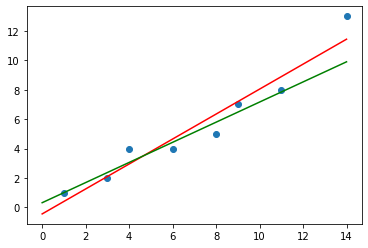

In [54]:
plt.scatter(df[0], df[1])
plt.plot(x,y, c="r")
plt.plot(x,y2,c="g")

In [55]:
df["y_pred2"] = lr2.predict(df[0].to_frame())
df["residuals2"] = df["y_pred2"] - df[1]

In [56]:
df

,0,1,y_pred,residuals,residuals_studentized,y_pred2,residuals2
0,1,1,0.409091,-0.590909,-0.174843,1.007519,0.007519
1,3,2,2.106061,0.106061,0.443652,2.375940,0.375940
2,4,4,2.954545,-1.045455,-0.715183,3.060150,-0.939850
3,6,4,4.651515,0.651515,0.903389,4.428571,0.428571
4,8,5,6.348485,1.348485,1.555367,5.796992,0.796992
5,9,7,7.196970,0.196970,0.386985,6.481203,-0.518797
6,11,8,8.893939,0.893939,1.079611,7.849624,-0.150376
7,14,13,11.439394,-1.560606,-2.074184,9.902256,-3.097744


In [57]:
df.iloc[:-1].mean()

0                        6.000000e+00
1                        4.428571e+00
y_pred                   4.651515e+00
residuals                2.229437e-01
residuals_studentized    4.969969e-01
y_pred2                  4.428571e+00
residuals2              -9.516197e-17
dtype: float64

In [59]:
df = df.iloc[:-1]

In [60]:
r2_lr = r2_score(y_pred=df["y_pred"], y_true=df[1])
r2_lr2 = r2_score(y_pred=df["y_pred2"], y_true=df[1])

In [62]:
r2_lr, r2_lr2

(0.8797748490413779, 0.9433811802232854)

### Challenge 2

In [12]:
df = pd.read_csv("../data/vehicles.csv")

In [13]:
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [14]:
col = ["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile", "CO2 Emission Grams/Mile", "Fuel Type"]

In [15]:
df["Fuel Type"].value_counts()

Regular                        23587
Premium                         9921
Gasoline or E85                 1195
Diesel                           911
Premium or E85                   121
Midgrade                          74
CNG                               60
Premium and Electricity           20
Gasoline or natural gas           20
Premium Gas or Electricity        17
Regular Gas and Electricity       16
Gasoline or propane                8
Regular Gas or Electricity         2
Name: Fuel Type, dtype: int64

In [10]:
df2 = pd.get_dummies(df, "Fuel Type")

In [11]:
df2.iloc[:100].corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year,Fuel Type_AM General,...,Fuel Type_Gasoline or natural gas,Fuel Type_Gasoline or propane,Fuel Type_Midgrade,Fuel Type_Premium,Fuel Type_Premium Gas or Electricity,Fuel Type_Premium and Electricity,Fuel Type_Premium or E85,Fuel Type_Regular,Fuel Type_Regular Gas and Electricity,Fuel Type_Regular Gas or Electricity
Year,1.000000,0.036395,-0.125869,-0.469832,4.105253e-01,0.657280,0.512342,-0.469876,-0.138486,-0.320951,...,NaN,NaN,NaN,5.940390e-01,NaN,NaN,NaN,-5.940390e-01,NaN,NaN
Engine Displacement,0.036395,1.000000,0.882096,0.803264,-7.339200e-01,-0.623195,-0.738080,0.802642,0.890158,0.284488,...,NaN,NaN,NaN,3.753471e-01,NaN,NaN,NaN,-3.753471e-01,NaN,NaN
Cylinders,-0.125869,0.882096,1.000000,0.729883,-7.044405e-01,-0.611107,-0.706107,0.727990,0.780215,0.051571,...,NaN,NaN,NaN,2.754243e-01,NaN,NaN,NaN,-2.754243e-01,NaN,NaN
Fuel Barrels/Year,-0.469832,0.803264,0.729883,1.000000,-8.674129e-01,-0.943850,-0.946308,0.999840,0.867478,0.573216,...,NaN,NaN,NaN,-1.230831e-02,NaN,NaN,NaN,1.230831e-02,NaN,NaN
City MPG,0.410525,-0.733920,-0.704440,-0.867413,1.000000e+00,0.828596,0.968822,-0.871909,-0.786178,-0.263699,...,NaN,NaN,NaN,-3.453264e-17,NaN,NaN,NaN,5.525222e-17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fuel Type_Premium and Electricity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Type_Premium or E85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fuel Type_Regular,-0.594039,-0.375347,-0.275424,0.012308,5.525222e-17,-0.135970,-0.045318,0.013058,-0.474857,0.188398,...,NaN,NaN,NaN,-1.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN,NaN
Fuel Type_Regular Gas and Electricity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.groupby("Fuel Type").agg({"CO2 Emission Grams/Mile":"mean"})

,CO2 Emission Grams/Mile
Fuel Type,
CNG,454.976354
Diesel,470.905819
Gasoline or E85,527.444383
Gasoline or natural gas,638.967778
Gasoline or propane,666.525000
Midgrade,516.911921
Premium,481.159270
Premium Gas or Electricity,125.411765
Premium and Electricity,239.450000


In [20]:
fuel = df[["CO2 Emission Grams/Mile","Fuel Type"]]

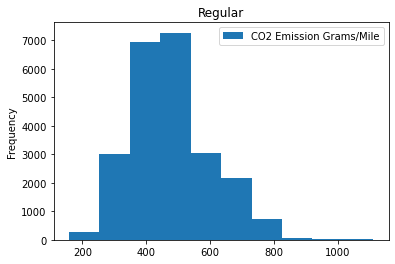

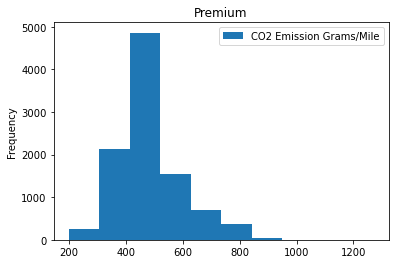

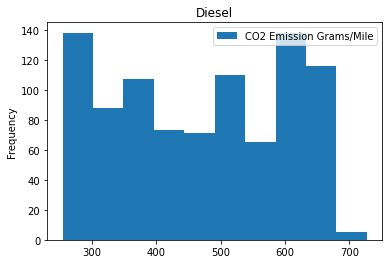

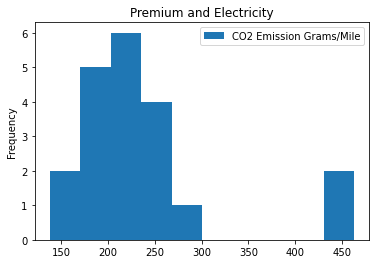

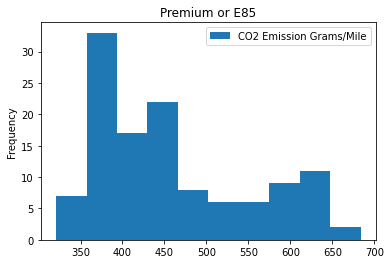

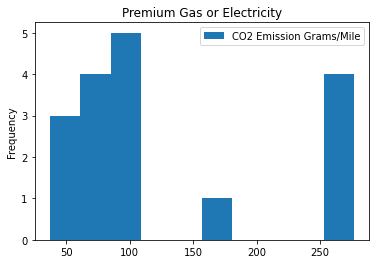

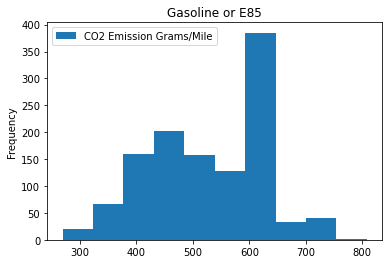

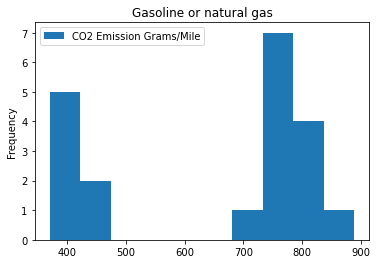

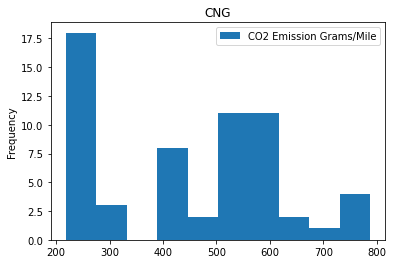

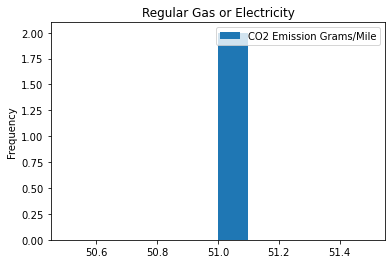

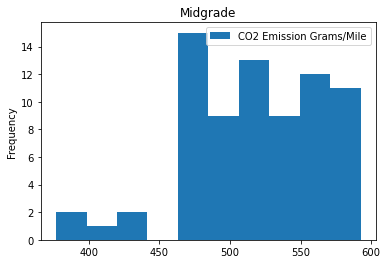

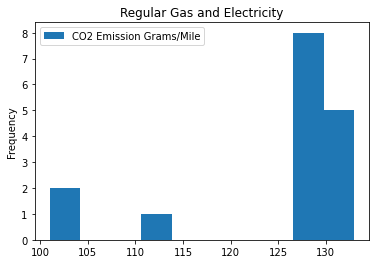

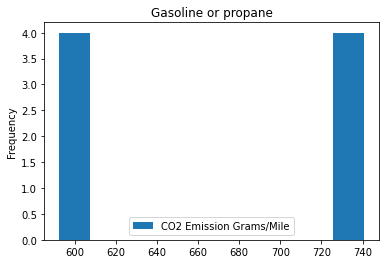

In [22]:
for ft in fuel["Fuel Type"].unique():
    fuel[fuel["Fuel Type"] == ft].plot.hist()
    plt.title(ft)

In [23]:
import seaborn as sns

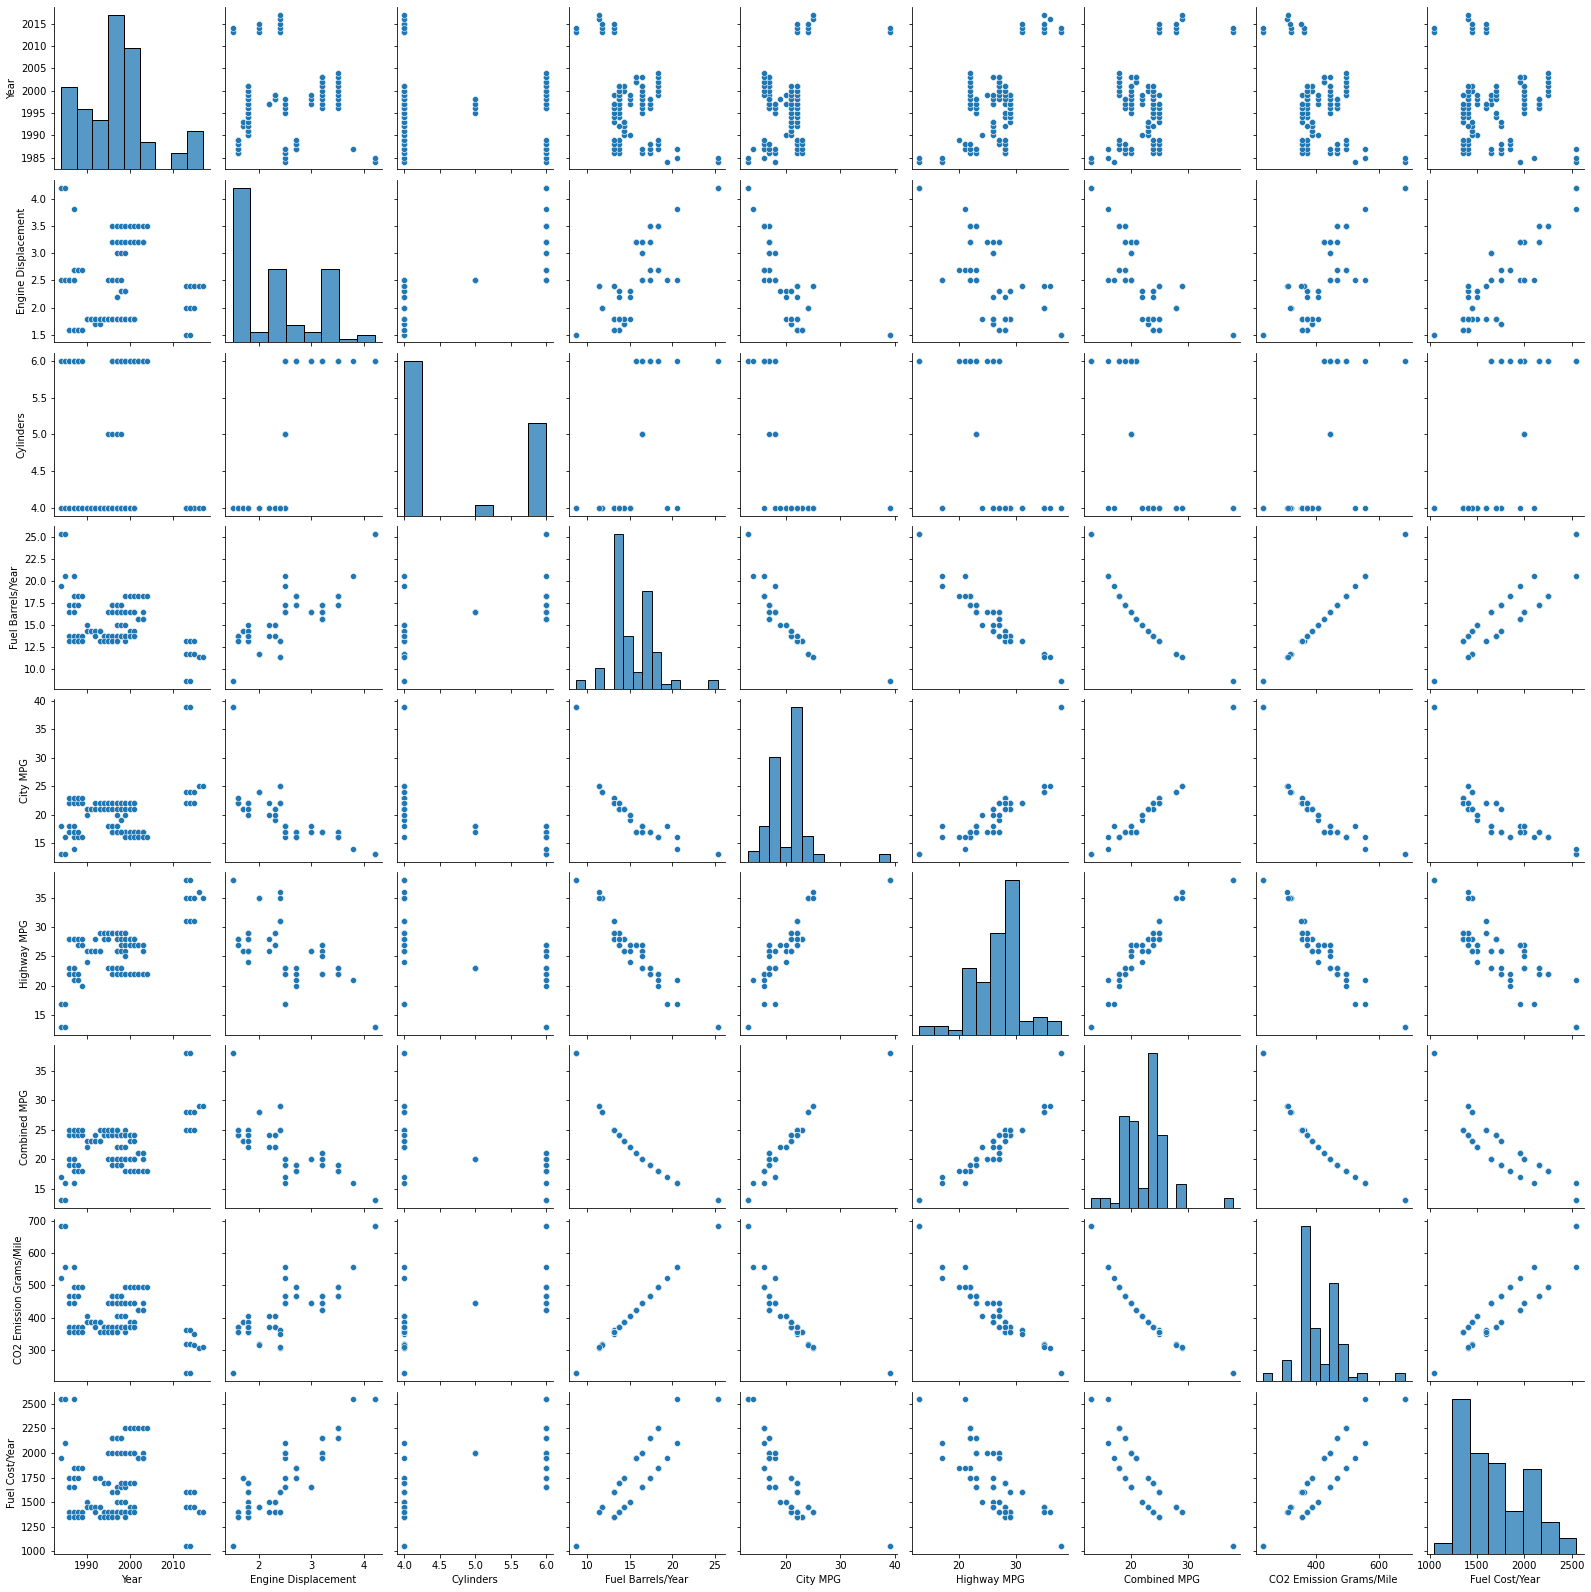

In [24]:
sns.pairplot(df.iloc[:100])